In [80]:
from pathlib import Path
from lagom.experiment import Configurator
from lagom.utils import pickle_load
from lagom.vis import CurvePlot


def load_loggings(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    
    out = []
    for seed_folder in p.iterdir():
        if seed_folder.is_dir() and (seed_folder/f).exists():
            out.append(pickle_load(seed_folder/f))
            
    return out


def get_items(loggings, key):
    out = []
    
    for logging in loggings:
        items = [x[key][0] for x in logging]
        out.append(items)
        
    return out

In [81]:
log_folder = Path(f'logs/')
configs = Configurator.to_dataframe(pickle_load(log_folder/'configs.pkl'))
configs

ID  cuda          env.id  env.standardize  env.time_aware_obs  \
0   0  True  HalfCheetah-v2             True               False   

   network.recurrent network.hidden_sizes  network.independent_V  algo.lr  \
0              False             [64, 64]                  False   0.0003   

   algo.lr_V   ...     agent.init_std  train.timestep  train.N  train.ratio_T  \
0      0.001   ...                0.5       1000000.0        2            1.0   

   eval.independent  eval.N  train.batch_size  train.num_epochs  log.interval  \
0             False      10               256                80            10   

   log.dir  
0     logs  

[1 rows x 37 columns]

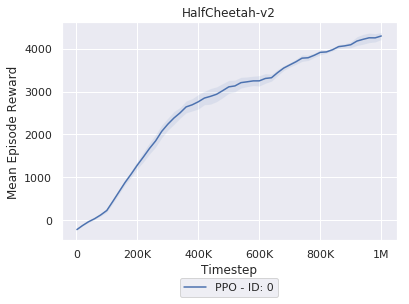

In [83]:
env_id = configs['env.id'][0]

plot = CurvePlot()
x_key = 'accumulated_trained_timesteps'
y_key = 'running_mean_return'
ylabel = 'Mean Episode Reward'
#y_key = 'explained_variance'
#ylabel = 'Explained Variance'

IDs = list(configs['ID'])
for ID in IDs:
    loggings = load_loggings(log_folder, ID, 'train_logs.pkl')
    x = get_items(loggings, x_key)
    y = get_items(loggings, y_key)
    plot.add(f'PPO - ID: {ID}', y, xvalues=x)

ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel=ylabel, 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[0.5], 
          alphas=[0.1])
legend = ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)
ax.figure.savefig('data/result.png', bbox_extra_artists=(legend,), bbox_inches='tight')